In [105]:
%matplotlib inline

In [106]:
# Import Dependencies
import json
import requests
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


In [107]:
# Import csv file and make DataFrame
uber_data = Path("../Resources/Uber_Project_CSV.csv")
uber_df = pd.read_csv(uber_data)
uber_df=uber_df.astype({"pickup_dt":"datetime64[D]"})
uber_df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [108]:
#Create DF from uber data showing total number of pickups per day

pickup_df= uber_df[["pickup_dt", "pickups"]]
pickup_df=pickup_df.rename(columns={"pickup_dt": "Date of Observation"}|{"pickups":"Number of Pickups"})
pickup_df=pickup_df.groupby("Date of Observation").agg({"Number of Pickups": "sum"}).reindex()
pickup_df.head()

,Number of Pickups
Date of Observation,
2015-01-01,54671
2015-01-02,39668
2015-01-03,59244
2015-01-04,43230
2015-01-05,43591


In [109]:
#Import URL and API CSV file
#url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/new%2520york%2520city/2015-01-01/2015-06-30?elements=datetime%2CdatetimeEpoch%2Ctemp%2Ctempmax%2Ctempmin%2Cprecip%2Cwindspeed%2Cwindgust%2Cfeelslike%2Cfeelslikemax%2Cfeelslikemin%2Cpressure%2Cstations%2Cdegreedays%2Caccdegreedays&include=fcst%2Cobs%2Chistfcst%2Cstats%2Chours&key=9R8U63UTPUJVYD92WRCVMZZXB&options=preview&contentType=json"
weather_api = Path("../Resources/new york city 2015-01-01 to 2015-06-30.csv")
weather_df= pd.read_csv(weather_api)

weather_df.head()


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,new york city,2015-01-01,3.7,-2.6,0.5,2.1,-8.3,-3.5,-12.4,37.7,...,9.9,5,NaN,2015-01-01T07:20:09,2015-01-01T16:39:07,0.38,Clear,Clear conditions throughout the day.,clear-day,"72505394728,KLGA,KNYC,72503014732"
1,new york city,2015-01-02,5.7,2.2,3.7,2.5,-2.2,0.1,-8.4,41.0,...,9.5,5,NaN,2015-01-02T07:20:15,2015-01-02T16:39:58,0.41,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72505394728,KLGA,KNYC,72503014732"
2,new york city,2015-01-03,4.8,0.8,2.1,1.7,-3.4,-1.0,-3.3,69.4,...,5.2,3,NaN,2015-01-03T07:20:19,2015-01-03T16:40:50,0.45,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with rain or ...,rain,"72505394728,KLGA,KNYC,72503014732"
3,new york city,2015-01-04,13.0,5.0,9.0,13.0,2.6,8.1,7.0,87.4,...,3.8,3,NaN,2015-01-04T07:20:20,2015-01-04T16:41:44,0.50,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"72505394728,KLGA,KNYC,72503014732"
4,new york city,2015-01-05,10.2,-5.6,2.4,10.2,-11.5,-2.3,-11.0,37.1,...,9.9,5,NaN,2015-01-05T07:20:19,2015-01-05T16:42:40,0.52,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72505394728,KLGA,KNYC,72503014732"


In [110]:
#Create DF from API for datetime and feels like temp

weather_df=weather_df[["datetime", "feelslike"]]
weather_df=weather_df.rename(columns={"datetime": "Date of Observation"}|{"feelslike":"Feels Like Temperature(C)"})
weather_df=weather_df.astype({"Date of Observation":"datetime64[D]"})
weather_df.head()


,Date of Observation,Feels Like Temperature(C)
0,2015-01-01,-3.5
1,2015-01-02,0.1
2,2015-01-03,-1.0
3,2015-01-04,8.1
4,2015-01-05,-2.3


In [111]:
#Merging weather_df from API and pickup_df from our Dataset to see the number of rides per day vs the feels like temp
nyc_merge_df= pd.merge(pickup_df, weather_df, on='Date of Observation', how='inner')
nyc_merge_df.head()

,Date of Observation,Number of Pickups,Feels Like Temperature(C)
0,2015-01-01,54671,-3.5
1,2015-01-02,39668,0.1
2,2015-01-03,59244,-1.0
3,2015-01-04,43230,8.1
4,2015-01-05,43591,-2.3


The r-value is: 0.3641859639218663


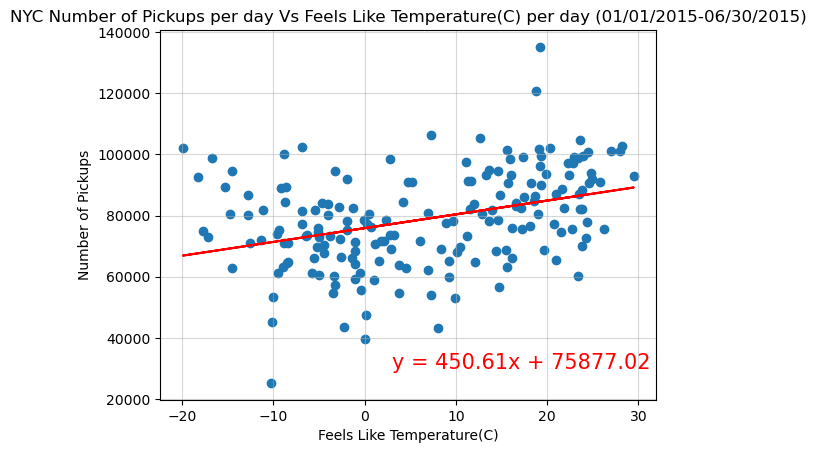

In [112]:
#Create plot showing relationship between number of pickups and feels like temp
x_values= nyc_merge_df["Feels Like Temperature(C)"]
y_values= nyc_merge_df["Number of Pickups"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,30000),fontsize=15,color="red")
plt.title("NYC Number of Pickups per day Vs Feels Like Temperature(C) per day (01/01/2015-06/30/2015)")
plt.ylabel("Number of Pickups")
plt.xlabel("Feels Like Temperature(C)")
plt.grid(True, alpha= 0.5)
print(f"The r-value is: {rvalue}")


# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [113]:
# Does Wind Speed affect the number of pickups? How does wind with or without precipitation affect it? - Ryan
wind_df= uber_df[["pickup_dt", "borough", "pickups", "spd", "pcp01"]]
wind_df= wind_df.rename(columns={"pickup_dt": "Date of Observation"}|{"borough":"Borough"}|{"pickups":"Number of Pickups"}|{"spd":"Wind Speed"}|{"pcp01":"Precipitaion Amount"})

wind_df.head()


,Date of Observation,Borough,Number of Pickups,Wind Speed,Precipitaion Amount
0,2015-01-01,Bronx,152,5.0,0.0
1,2015-01-01,Brooklyn,1519,5.0,0.0
2,2015-01-01,EWR,0,5.0,0.0
3,2015-01-01,Manhattan,5258,5.0,0.0
4,2015-01-01,Queens,405,5.0,0.0


In [114]:
#toatl number of pickups and average wind speed per date

converted_wind_df= wind_df[["Borough", "Number of Pickups", "Wind Speed", "Precipitaion Amount", "Date of Observation"]]
converted_wind_df= converted_wind_df.groupby("Date of Observation").agg({"Number of Pickups": "sum", "Wind Speed": "mean"}).reindex()
converted_wind_df.head()


,Number of Pickups,Wind Speed
Date of Observation,,
2015-01-01,54671,6.065359
2015-01-02,39668,7.582278
2015-01-03,59244,6.243438
2015-01-04,43230,5.645541
2015-01-05,43591,10.898089


The r-value is: -0.22577964333481676


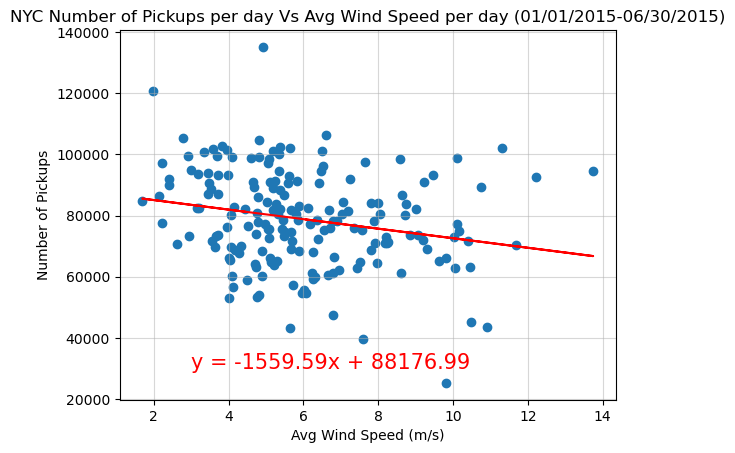

In [115]:
#plt.scatter(converted_wind_df["Wind Speed"], converted_wind_df["Number of Pickups"], edgecolors= "black", marker="o")
x_values= converted_wind_df["Wind Speed"]
y_values= converted_wind_df["Number of Pickups"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,30000),fontsize=15,color="red")
plt.title("NYC Number of Pickups per day Vs Avg Wind Speed per day (01/01/2015-06/30/2015)")
plt.ylabel("Number of Pickups")
plt.xlabel("Avg Wind Speed (m/s)")
plt.grid(True, alpha= 0.5)
print(f"The r-value is: {rvalue}")


# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [116]:
#How do the different borughs compare with pickups?
borough_df= uber_df[["borough", "pickups"]]
borough_df= borough_df.rename(columns={"borough": "NYC Borough"}|{"pickups":"Number of Pickups"})
borough_df= borough_df.groupby("NYC Borough").agg({"Number of Pickups": "sum"}).reindex()
borough_df.head()

,Number of Pickups
NYC Borough,
Bronx,220047
Brooklyn,2321035
EWR,105
Manhattan,10367841
Queens,1343528


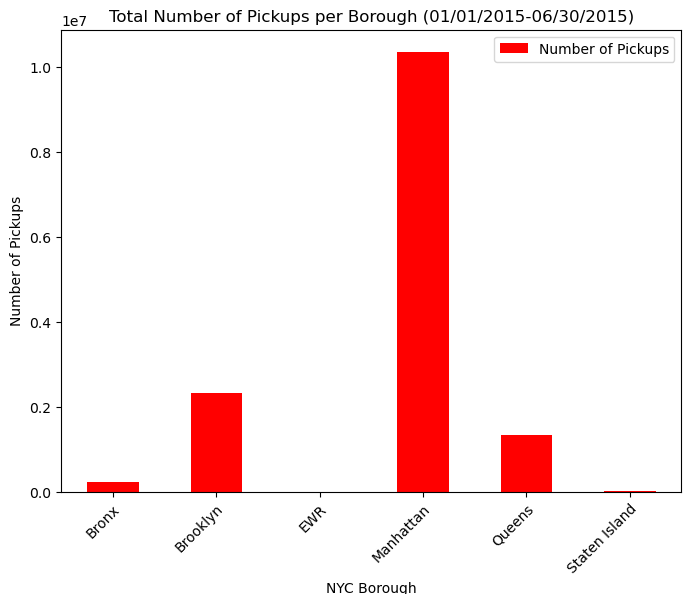

In [117]:
figure1 = borough_df.plot(kind="bar", facecolor="red", figsize=(8,6),
                                title="Total Number of Pickups per Borough (01/01/2015-06/30/2015)",
                                xlabel="NYC Borough",
                                ylabel="Number of Pickups")

# Configure x-tick rotation
xticklabels = borough_df.index
figure1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

plt.show()

In [ ]:
#Bronx DataFrame per Day

bronx_df= wind_df.loc[(wind_df["Borough"]=="Bronx"),:]
bronx_df= bronx_df.groupby("Time of Observation").agg({"Number of Pickups": "sum", "Wind Speed": "mean"}).reindex()
bronx_df.head()

In [ ]:
#Brooklyn DataFrame per Day

brooklyn_df=wind_df.loc[(wind_df["Borough"]=="Brooklyn"),:]
brooklyn_df=brooklyn_df.groupby("Time of Observation").agg({"Number of Pickups": "sum", "Wind Speed": "mean"}).reindex()
brooklyn_df.head()

In [ ]:
#EWR DataFrame Per Day

EWR_df=wind_df.loc[(wind_df["Borough"]=="EWR"),:]
EWR_df=EWR_df.groupby("Time of Observation").agg({"Number of Pickups": "sum", "Wind Speed": "mean"}).reindex()
EWR_df.head()

In [ ]:
#Manhattan DataFrame Per Day

Manhattan_df=wind_df.loc[(wind_df["Borough"]=="Manhattan"),:]
Manhattan_df=Manhattan_df.groupby("Time of Observation").agg({"Number of Pickups": "sum", "Wind Speed": "mean"}).reindex()
Manhattan_df.head()

In [ ]:
#Queens DataFrame Per Day

Queens_df=wind_df.loc[(wind_df["Borough"]=="Queens"),:]
Queens_df=Queens_df.groupby("Time of Observation").agg({"Number of Pickups": "sum", "Wind Speed": "mean"}).reindex()
Queens_df.head()

In [ ]:
#Staten Island DataFrame Per Day

Staten_Island_df=wind_df.loc[(wind_df["Borough"]=="Staten Island"),:]
Staten_Island_df=Staten_Island_df.groupby("Time of Observation").agg({"Number of Pickups": "sum", "Wind Speed": "mean"}).reindex()
Staten_Island_df.head()

In [ ]:
#Create dataframe for when precipitation occurs and for when there is no precipitation
wind_precip_df= wind_df.loc[(wind_df["Precipitaion Amount"]>0),:]
wind_precip_df= wind_precip_df.groupby("Time of Observation").agg({"Number of Pickups": "sum", "Wind Speed": "mean"}).reindex()
wind_precip_df.head()

In [ ]:
wind_dry_df= wind_df.loc[(wind_df["Precipitaion Amount"]==0),:]
wind_dry_df= wind_dry_df.groupby("Time of Observation").agg({"Number of Pickups": "sum", "Wind Speed": "mean"}).reindex()
wind_dry_df.head()


In [ ]:
#Does different boroughs? Ryan
borough_df= wind_df.groupby(["Borough"]).agg({"Number of Pickups": "sum", "Wind Speed": "mean"}).reindex()

borough_df.head()


In [ ]:
# Correlation and Regression

## Analysis